In [2]:
# numpy로 RNN 구현하기

import numpy as np

timesteps = 100    # 입력 시퀀스에 있는 타임 스텝의 수
input_features = 32    # 입력 특성의 차원
output_features = 64   # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features, ))        # 초기상태 0

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: # input_t.shape : (input_features,)
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0) # 최종 출력 크기는 (timesteps, output_features)인 2D 텐서.

In [3]:
final_output_sequence.shape

(100, 64)

In [13]:
np.dot(W, input_t)

array([ 8.49232944,  9.00573722, 10.18562827,  8.71206077,  9.24690476,
       10.60336331,  9.14099268,  9.82443054,  7.95305508,  9.21160214,
        8.52780503,  9.84431411, 10.14974315,  6.63213011,  8.20422489,
       10.10767763,  7.80470637,  8.7091744 ,  9.63193576,  9.64842531,
        9.39527872,  8.41652063,  8.62237132,  8.79821661,  7.80492783,
        8.3088364 ,  8.72665528,  8.40984461,  9.16467699,  9.79922554,
        9.26859699, 10.02390711,  6.79887629,  8.68566112,  9.94461547,
        8.54333558, 10.18940992, 10.84420302, 11.46161614, 10.21699539,
        7.2442369 ,  8.95294791,  8.39093045,  9.39029431,  7.84496055,
        9.61127059,  8.83175951,  9.9244018 ,  8.53144852,  9.42361086,
        9.74683264, 10.25863182,  8.30866349, 10.28417332, 10.74666632,
        9.46275835,  8.55153708, 10.66151708,  9.04336315,  9.66384961,
        8.1298841 ,  7.64295379,  7.80407678,  7.30073696])

## IMDB 문제 적용해보기

In [23]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

#데이터 로딩
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(f'''
~ 1. raw datasets ~
input_train.shape : {input_train.shape}
input_test.shape: {input_test.shape}
y_train : {y_train.shape}
y_test : {y_test.shape}

input_train sample : {input_train}

''')

print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩(sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)


print(f'''
~ 2. padding ~
input_train.shape : {input_train.shape}
input_test.shape: {input_test.shape}
y_train : {y_train.shape}
y_test : {y_test.shape}
''')


~ 1. raw datasets ~
input_train.shape : (25000,)
input_test.shape: (25000,)
y_train : (25000,)
y_test : (25000,)

input_train sample : [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16,

In [39]:
# Embedding층과 SimpleRNN층을 사용해 간단한 순환 네트워크 훈련.
from keras.layers import Dense
from tensorflow.keras import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 35s 207ms/step - loss: 0.6384 - acc: 0.6213 - val_loss: 0.5328 - val_acc: 0.7344
Epoch 2/10
157/157 [==============================] - 41s 259ms/step - loss: 0.3949 - acc: 0.8331 - val_loss: 0.4103 - val_acc: 0.8150
Epoch 3/10
157/157 [==============================] - 37s 234ms/step - loss: 0.2837 - acc: 0.8880 - val_loss: 0.4602 - val_acc: 0.7740
Epoch 4/10
157/157 [==============================] - 37s 237ms/step - loss: 0.2378 - acc: 0.9050 - val_loss: 0.4443 - val_acc: 0.8080
Epoch 5/10
157/157 [==============================] - 39s 246ms/step - loss: 0.1741 - acc: 0.9352 - val_loss: 0.4068 - val_acc: 0.8488
Epoch 6/10
157/157 [==============================] - 38s 244ms/step - loss: 0.1202 - acc: 0.9575 - val_loss: 0.5219 - val_acc: 0.8062
Epoch 7/10
157/157 [==============================] - 39s 246ms/step - loss: 0.0720 - acc: 0.9771 - val_loss: 0.4664 - val_acc: 0.8416
Epoch 8/10
157/157 [==============================] - 3

epochs  range(1, 11)


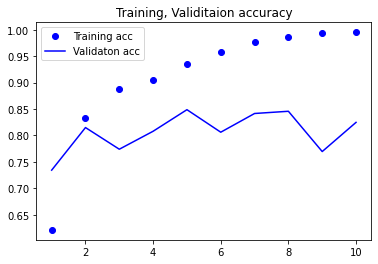

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
print('epochs ', epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validaton acc')
plt.title('Training, Validitaion accuracy')
plt.legend()
plt.show()

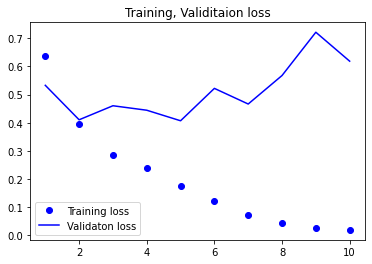

In [42]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validaton loss')
plt.title('Training, Validitaion loss')
plt.legend()
plt.show()

In [45]:
y_pred = model.predict(input_test)
results = model.evaluate(input_test, y_test)
results # test loss / test accuracy

782/782 [==============================] - 34s 43ms/step - loss: 0.6588 - acc: 0.8173


[0.6587790846824646, 0.8172799944877625]